In [116]:
# For PostGREs and SQLAlchemy
!pip install psycopg2 sqlalchemy

In [117]:
# Dependencies and Setup
# SQL Alchemy
from sqlalchemy import create_engine

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# NumPy
import numpy as np

In [118]:
# Create Engine and Pass in Postgres Connection
# Setup to Connect to Database 
from sqlalchemy import create_engine
engine = create_engine('postgres://postgres:PaswordABCDlocalhost:5432/sql_db')
conn = engine.connect()

In [119]:
# Query All Records in the the Database
titles_pd = pd.read_sql("SELECT * FROM titles", conn)
titles_pd.head()

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [120]:
employee_pd = pd.read_sql("SELECT * FROM employees", conn)
employee_pd.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,gender,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [121]:
salary_pd = pd.read_sql("SELECT * FROM salaries", conn)
salary_pd.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [122]:
combined = pd.merge(employee_pd,salary_pd,on="emp_no")
combined.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,gender,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [123]:
# Groupby Title
grouped_df = combined.groupby("salary").mean()
grouped_df

,emp_no
salary,
40000,253088.803788
40001,224520.800000
40002,261890.000000
40003,285494.777778
40004,304134.666667
...,...
125469,37558.000000
126703,458302.000000
127041,444756.000000


In [124]:
# Groupby Title
grouped_df = combined.groupby("emp_title_id").mean()
grouped_df

,emp_no,salary
emp_title_id,,
e0001,252992.595373,48564.434447
e0002,253654.345919,48535.336511
e0003,253038.749885,48506.799871
e0004,251811.432730,48582.896092
m0001,110780.833333,51531.041667
s0001,253408.503604,58465.382850
s0002,254481.798969,58550.172704


In [125]:
# Drop emp_no from grouped_df to Show Only title & salary
revised_grouped_df = grouped_df.drop(columns = "emp_no")
revised_grouped_df

,salary
emp_title_id,
e0001,48564.434447
e0002,48535.336511
e0003,48506.799871
e0004,48582.896092
m0001,51531.041667
s0001,58465.382850
s0002,58550.172704


In [126]:
# Reset Index
revised_grouped_df = revised_grouped_df.reset_index()
revised_grouped_df

,emp_title_id,salary
0,e0001,48564.434447
1,e0002,48535.336511
2,e0003,48506.799871
3,e0004,48582.896092
4,m0001,51531.041667
5,s0001,58465.382850
6,s0002,58550.172704


FileNotFoundError: [Errno 2] No such file or directory: './Images/average_salary_by_title_Id.png'

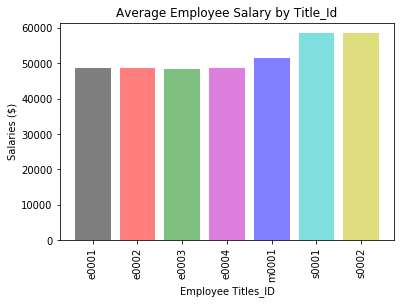

In [127]:
# Set x_axis, y_axis & Tick Locations
x_axis = revised_grouped_df["emp_title_id"]
ticks = np.arange(len(x_axis))
y_axis = revised_grouped_df["salary"]
 
# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center", alpha=0.5, color=["k", "r", "g", "m", "b", "c", "y"])

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, x_axis, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles_ID")
plt.title("Average Employee Salary by Title_Id")

# Save Figure
plt.savefig("./Images/average_salary_by_title_Id.png")

# Show plot
plt.show()